In [2]:
# DO NOT EDIT THIS CELL

print("importing...")
import csv
import random
import math
import operator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
print("done")

importing...
done


In [3]:
#Input data
data_set = 'students.data'

In [4]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset) - 1):
            for y in range(len(dataset[0]) - 1):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

## Implement the following functions

1. euclideanDistance
2. getNeighbors
3. estimateType

In [5]:
import numpy as np

In [6]:
train = []
test = []

loadDataset(data_set, .75, train, test)

print('train sample', end='\n\n')
for i in range(10):
    print(train[i])
    
    
print('test sample', end='\n\n')
for i in range(10):
    print(test[i])

train sample

[53.0, 114.0, 'passes']
[83.0, 121.0, 'passes']
[94.0, 116.0, 'passes']
[95.0, 78.0, 'passes']
[55.0, 129.0, 'passes']
[94.0, 87.0, 'passes']
[79.0, 85.0, 'passes']
[67.0, 99.0, 'passes']
[54.0, 100.0, 'passes']
[72.0, 124.0, 'passes']
test sample

[87.0, 117.0, 'passes']
[82.0, 122.0, 'passes']
[59.0, 92.0, 'passes']
[50.0, 105.0, 'passes']
[6.0, 83.0, 'fails']
[6.0, 80.0, 'fails']
[93.0, 130.0, 'passes']
[31.0, 123.0, 'passes']
[60.0, 114.0, 'passes']
[65.0, 84.0, 'passes']


Training data
Test data


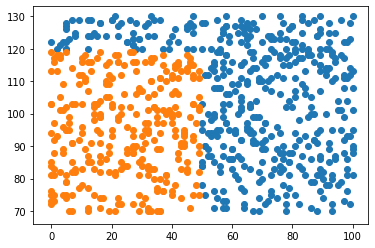

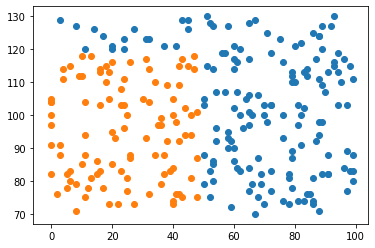

In [7]:
def plot_data(data_sample):
    
    types = set([t[2] for t in data_sample])
    for t in types:
        df = [row for row in data_sample if row[2] == t]
        xs = [row[0] for row in df]
        ys = [row[1] for row in df]
        plt.scatter(xs, ys)
    plt.show()

print("Training data")
plot_data(train)

print("Test data")
plot_data(test)

In [8]:
# TODO Task 4B.1

def euclideanDistance(sample1, sample2):
    p1 = sample1[:2]
    p2 = sample2[:2]
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(p1, p2)]))
    return distance

print(train[0])
print(train[1])

euclideanDistance(train[0], train[1])

[53.0, 114.0, 'passes']
[83.0, 121.0, 'passes']


30.805843601498726

In [9]:
# TODO Task 4B.2

def getNeighbors(trainingSet, testSample):
    
    k = 3
    
    #TODO: calcualte the euclidean distance to the neighbors.
    #Then return the k-nearest.
    
    neighbors = []
    for s in trainingSet:
        distance = euclideanDistance(s, testSample)
        neighbors.append((s, distance))
    nearest = sorted(neighbors, key=lambda t: t[1])
    
    # return with distance
    return nearest[:k]

sample = test[0]
neighbors = getNeighbors(train, sample)

print(sample)
for n in neighbors:
    print(n)

[87.0, 117.0, 'passes']
([87.0, 116.0, 'passes'], 1.0)
([86.0, 118.0, 'passes'], 1.4142135623730951)
([85.0, 118.0, 'passes'], 2.23606797749979)


In [10]:
# TODO Task 4B.3


def estimateType(neighbors):
    
    #TODO: determine the type of the current sample
    #by checking the neighbors and return it.
    
    types = dict()
    for key in set([t[2] for t in train]):
        types[key] = dict(count=0, distance=0)
    # types: 
    # {
    #     'passed': {
    #         'count': 0
    #         'distance': 0
    #     },
    #     ...
    # }
    
    for n in neighbors:
        key = n[0][2]
        types[key]['count'] += 1
        types[key]['distance'] += n[1]
        
    # max count of all types
    max_val = max(types.items(), key = lambda x: x[1]['count'])[1]['count']
    # may contain multiple types in case of even k (eg. fails=2, passed=2)
    targets = [t for t in types.items() if t[1]['count'] == max_val]
    
    # return the first type if only one type is inside the list
    if len(targets) == 1:
        return targets[0][0]
    
    # otherwise sort by distance and return the type with the lowest distance
    targets = sorted(targets, key=lambda t: t[1]['distance'])
    return targets[0]

estimateType(neighbors)

'passes'

In [11]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [12]:
from datetime import datetime
start = datetime.now()

predictions = [estimateType(getNeighbors(train, t)) for t in test]

end = datetime.now()
print('Took %s to complete' % str(end - start))

print('Accuracy: %f' % getAccuracy(test, predictions))

Took 0:00:00.466882 to complete
Accuracy: 97.244094


## Take a look on the data to get an impression of what's going on.

You should see two clusters of students.

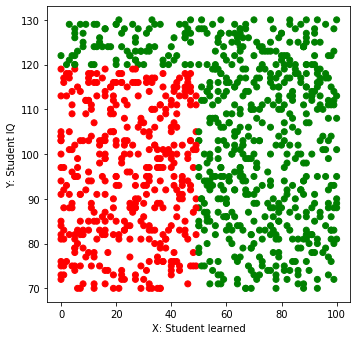

In [13]:
xs = []
ys = []
zs = []
cs = []

fig = plt.figure(figsize=(25, 25))

plot_2d = fig.add_subplot(441)

with open(data_set, 'r') as csvfile:
    lines = csv.reader(csvfile)
    data = list(lines)
    for d in data:
        xs.append(int(d[0]))
        ys.append(int(d[1]))
        cs.append('r' if d[2] == "fails" else "g")

plot_2d.scatter(xs, ys, c=cs, marker='o')
plot_2d.set_xlabel('X: Student learned')
plot_2d.set_ylabel('Y: Student IQ')

plt.show()

In [14]:
trainingSet = []
testSet = []
split = 0.67

loadDataset(data_set, split, trainingSet, testSet)
print ('Train set: ' + repr(len(trainingSet)))
print ('Test set: ' + repr(len(testSet)))

predictions=[]

#This is k 
count = 0
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x])
    result = estimateType(neighbors)
    predictions.append(result)
    print(str(count) + ': predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    count += 1
    
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 666
Test set: 333
0: predicted='passes', actual='passes'
1: predicted='passes', actual='passes'
2: predicted='passes', actual='passes'
3: predicted='passes', actual='passes'
4: predicted='passes', actual='passes'
5: predicted='passes', actual='passes'
6: predicted='passes', actual='passes'
7: predicted='passes', actual='passes'
8: predicted='passes', actual='passes'
9: predicted='fails', actual='fails'
10: predicted='fails', actual='fails'
11: predicted='fails', actual='passes'
12: predicted='fails', actual='fails'
13: predicted='passes', actual='passes'
14: predicted='fails', actual='fails'
15: predicted='passes', actual='passes'
16: predicted='passes', actual='passes'
17: predicted='fails', actual='fails'
18: predicted='fails', actual='fails'
19: predicted='fails', actual='fails'
20: predicted='fails', actual='fails'
21: predicted='fails', actual='fails'
22: predicted='passes', actual='passes'
23: predicted='fails', actual='fails'
24: predicted='fails', actual='fails'
25: 